## 1. Introdução
<p>Este <i>dataset</i> contém dados meteorológicos do Aeroporto Internacional de Raleigh Durham retirados do serviço da Web do NOAA.</p>

## 2. Lendo os Dados

In [16]:
import pandas as pd

# As colunas estão separadas pelo símbolo ';' #. 
weather_history = pd.read_csv('rdu-weather-history.csv', sep=';')

## 3. Visão geral
<p>O <i>dataset</i> contém informação sobre dados meteorológicos do Aeroporto Internacional de Raleigh Durham, desde 2007. Possui dados como temperaturas mínimas e máximas, volume de chuva, velocidade do vento e etc.</p>   
</p>Visualizando as primeiras cinco entradas do DataFrame:</p>    

In [17]:
weather_history.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2009-10-03,55.0,82.0,0.00,0.0,0.0,2.91,240.0,16.11,230.0,...,No,No,No,No,No,No,No,No,No,No
1,2009-10-10,59.0,79.0,0.02,0.0,0.0,7.83,220.0,17.00,220.0,...,No,No,No,No,No,No,Yes,No,No,No
2,2009-10-14,46.9,61.0,0.14,0.0,0.0,8.72,40.0,14.99,50.0,...,Yes,No,No,No,No,No,Yes,No,No,No
3,2009-10-17,45.0,57.9,0.00,0.0,0.0,6.26,30.0,14.09,40.0,...,No,No,No,No,No,No,No,No,No,No
4,2009-10-29,48.0,68.0,0.00,0.0,0.0,5.82,80.0,14.99,70.0,...,No,No,No,No,No,No,No,No,No,No


In [18]:
# Número de entradas
print("Número de linhas do dataset:", weather_history.shape[0])

print("\n\nResumo estatístico do DataFrame:")
weather_history.describe()

Número de linhas do dataset: 4137


Resumo estatístico do DataFrame:


,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
count,4136.000000,4136.000000,4136.000000,4135.000000,4136.000000,4134.000000,4135.000000,4135.000000,4118.000000,4118.000000
mean,50.540063,72.017021,0.126630,0.012965,0.017384,5.860614,172.541717,15.957151,177.056824,21.801610
std,16.229527,16.530515,0.371318,0.195214,0.213953,2.958446,94.603272,5.270319,96.850988,7.096004
min,4.100000,23.200000,0.000000,0.000000,0.000000,0.000000,10.000000,4.920000,10.000000,6.930000
25%,37.000000,60.100000,0.000000,0.000000,0.000000,3.580000,80.000000,12.970000,90.000000,17.000000
50%,52.000000,73.900000,0.000000,0.000000,0.000000,5.370000,210.000000,14.990000,210.000000,21.030000
75%,64.900000,86.000000,0.040000,0.000000,0.000000,7.610000,240.000000,18.120000,240.000000,25.050000
max,80.100000,105.100000,6.450000,6.690000,5.910000,19.010000,360.000000,59.950000,360.000000,86.120000


In [19]:
weather_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 28 columns):
date                    4137 non-null object
temperaturemin          4136 non-null float64
temperaturemax          4136 non-null float64
precipitation           4136 non-null float64
snowfall                4135 non-null float64
snowdepth               4136 non-null float64
avgwindspeed            4134 non-null float64
fastest2minwinddir      4135 non-null float64
fastest2minwindspeed    4135 non-null float64
fastest5secwinddir      4118 non-null float64
fastest5secwindspeed    4118 non-null float64
fog                     4137 non-null object
fogheavy                4137 non-null object
mist                    4137 non-null object
rain                    4137 non-null object
fogground               4137 non-null object
ice                     4137 non-null object
glaze                   4137 non-null object
drizzle                 4137 non-null object
snow                    4137

## 3.1 Utilizando a função Seaborn de mapas de calor
<p>Seaborn é uma biblioteca em python para criação de visualizações estatísticas.</p>
<p>O método ```.corr() ```, calcula o <b>coeficiente de correlação de Pearson</b> entre todos os pares de colunas numéricas do DataFrame.</p>
<p>Interpretando o coeficiente:
- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

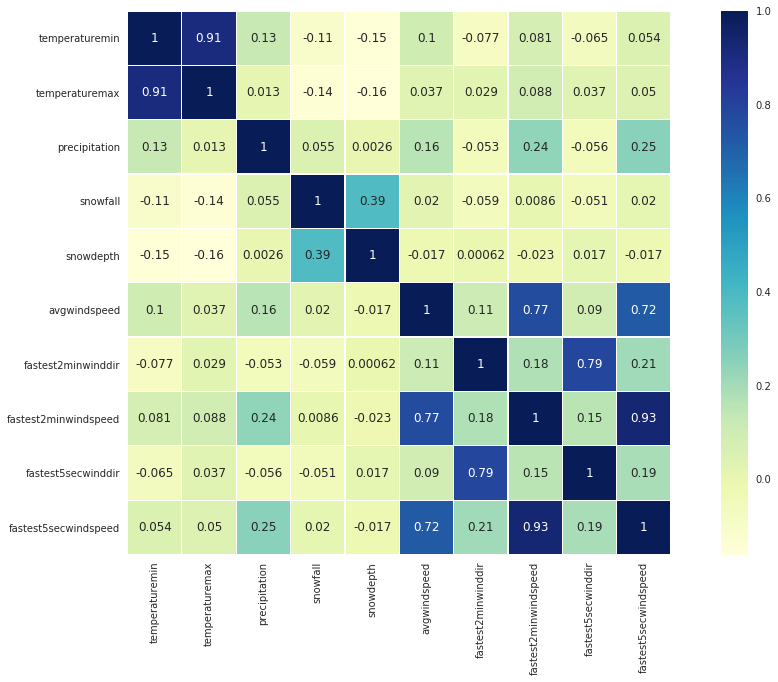

In [20]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
weather_map = sns.heatmap(weather_history.corr(), annot=True, square=True, cmap="YlGnBu", linewidths=.3)


## 4. Pré-processamento dos dados

In [21]:
# Substituindo as string por números binários -- No = 0 e Yes = 1

weather_history = weather_history.replace('No', 0.0)
weather_history = weather_history.replace('Yes', 1.0)

In [22]:
# Verificando a soma dos valores nulos em cada feature

weather_history.isnull().sum()

date                     0
temperaturemin           1
temperaturemax           1
precipitation            1
snowfall                 2
snowdepth                1
avgwindspeed             3
fastest2minwinddir       2
fastest2minwindspeed     2
fastest5secwinddir      19
fastest5secwindspeed    19
fog                      0
fogheavy                 0
mist                     0
rain                     0
fogground                0
ice                      0
glaze                    0
drizzle                  0
snow                     0
freezingrain             0
smokehaze                0
thunder                  0
highwind                 0
hail                     0
blowingsnow              0
dust                     0
freezingfog              0
dtype: int64

In [23]:
from sklearn.preprocessing import Imputer
import numpy as np

# Substituindo os valores nulos pela média dos valores referentes a feature
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
weather_history[['temperaturemin']] = imputer.fit_transform(weather_history[['temperaturemin']])
weather_history[['temperaturemax']] = imputer.fit_transform(weather_history[['temperaturemax']])
weather_history[['precipitation']] = imputer.fit_transform(weather_history[['precipitation']])
weather_history[['snowfall']] = imputer.fit_transform(weather_history[['snowfall']])
weather_history[['snowdepth']] = imputer.fit_transform(weather_history[['snowdepth']])
weather_history[['avgwindspeed']] = imputer.fit_transform(weather_history[['avgwindspeed']])
weather_history[['fastest2minwinddir']] = imputer.fit_transform(weather_history[['fastest2minwinddir']])
weather_history[['fastest2minwindspeed']] = imputer.fit_transform(weather_history[['fastest2minwindspeed']])
weather_history[['fastest5secwinddir']] = imputer.fit_transform(weather_history[['fastest5secwinddir']])
weather_history[['fastest5secwindspeed']] = imputer.fit_transform(weather_history[['fastest5secwindspeed']])

weather_history.isnull().sum()

date                    0
temperaturemin          0
temperaturemax          0
precipitation           0
snowfall                0
snowdepth               0
avgwindspeed            0
fastest2minwinddir      0
fastest2minwindspeed    0
fastest5secwinddir      0
fastest5secwindspeed    0
fog                     0
fogheavy                0
mist                    0
rain                    0
fogground               0
ice                     0
glaze                   0
drizzle                 0
snow                    0
freezingrain            0
smokehaze               0
thunder                 0
highwind                0
hail                    0
blowingsnow             0
dust                    0
freezingfog             0
dtype: int64

In [24]:
#Ordenando o dataset pela coluna data

#weather_history = weather_history.sort_values('date', ascending=True)
#weather_history.head()

## 4.1 Agrupamento dos dados para teste

<p>Como o clima de uma região possui uma grande relação com as estações do ano, os dados para teste foram agrupados de acordo com a estação que occorre em uma data específica.</p>

- Primavera: 20 de março a 20 de junho 
- Verão: 21 de junho a 21 de setembro
- Outono: 22 de setembro a 20 de dezembro
- Inverno: 21 de dezembro a 19 de março

### 4.1.1 Criando nova coluna "meantemp"
<p>Essa coluna representa a média das temperaturas mínima e máxima.</p>

In [25]:
meantemp_array = np.zeros(4137)

for i in range(0, 4137):
    meantemp = float((weather_history['temperaturemin'][i]) + (weather_history['temperaturemax'][i]))/2.0
       
    meantemp_array[i] = meantemp

weather_history['meantemp'] = meantemp_array


In [29]:
weather_history.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog,meantemp
0,20091003,55.0,82.0,0.00,0.0,0.0,2.91,240.0,16.11,230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.50
1,20091010,59.0,79.0,0.02,0.0,0.0,7.83,220.0,17.00,220.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,69.00
2,20091014,46.9,61.0,0.14,0.0,0.0,8.72,40.0,14.99,50.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,53.95
3,20091017,45.0,57.9,0.00,0.0,0.0,6.26,30.0,14.09,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.45
4,20091029,48.0,68.0,0.00,0.0,0.0,5.82,80.0,14.99,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.00


### 4.1.2 Criando nova coluna "Season"

<p>A coluna "season" foi criada com base nos periodos de inicio e de fim das estações do ano no local em que os dados foram colhidos.</p>
<p>Antes de utilizar o algoritimo para definir as estações a partir das datas é feita uma pequena alteração no formato da data.</p>   

Antes: <b>AAAA-MM-DD</b>  
Depois: <b>AAAAMMDD</b>

In [30]:
weather_history['date'] = weather_history['date'].replace({'-':''}, regex=True)

In [31]:
season_array = np.zeros(4137)
meantemp_array = np.zeros(4137)

for i in range(0, 4137):
    #formato: MMDD
    monthDay = int(weather_history['date'][i][4:8])
    
    if monthDay >= 1201 or monthDay < 301:
        season = 0 #'winter'
    elif monthDay >= 301 and monthDay < 601:
        season = 1 #'spring'
    elif monthDay >= 601 and monthDay < 901:
        season = 2 #'summer'
    elif monthDay >= 901 and monthDay < 1201:
        season = 3 #'autumn'    
    
    season_array[i] = season

weather_history['season'] = season_array

### 4.1.3 Criando DataFrames separados para cada estação    


In [32]:
winter_weather_history = weather_history[weather_history['season'] == 0]
summer_weather_history = weather_history[weather_history['season'] == 1]
spring_weather_history = weather_history[weather_history['season'] == 2]
autumn_weather_history = weather_history[weather_history['season'] == 3]

print("\nNúmero de linhas do dataframe:", winter_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", summer_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", spring_weather_history.shape[0])
print("\nNúmero de linhas do dataframe:", autumn_weather_history.shape[0])
#spring_weather_history.head()
#print(autumn_weather_history.head())


Número de linhas do dataframe: 1052

Número de linhas do dataframe: 1072

Número de linhas do dataframe: 1012

Número de linhas do dataframe: 1001


## 5. Lasso (Least Absolute Shrinkage Selector Operator)    

<p>O Lasso seleciona apenas algumas 'features', enquanto reduz os coeficientes de outras para zero. Essa propriedade é conhecida como 'feature selection' e está ausente no Ridge.</p>

Coeficientes:
 [ 0.          0.42762544  0.43495041  0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.          0.
  0.          0.          0.         -0.          0.        ]
0.981230386234785
[26.22391057 43.54630268 51.30948531 34.89856929 49.95454658 42.19136394
 53.02190683 36.68845844 41.04483272 28.81777581 42.17671401 36.18950308
 44.01009819 47.44620642 37.11067867 37.02323382 51.69434821 36.15214574
 53.05047421 37.83572216 42.17671401 45.62747217 36.58095845 40.21814922
 47.46085635 35.38406198 60.777032   40.46621225 41.33611306 38.82658564
 48.28726213 49.98384645 49.96919651 41.81455851 46.05464284 39.99582426
 40.47280472 42.67640186 51.19511512 44.77222129 34.89902406 41.80036334
 44.77222129 31.85391644 40.86572508 65.51021171 41.95795085 37.88580967
 43.92502787 48.18617757 39.12592345 46.48272305 37.02323382 

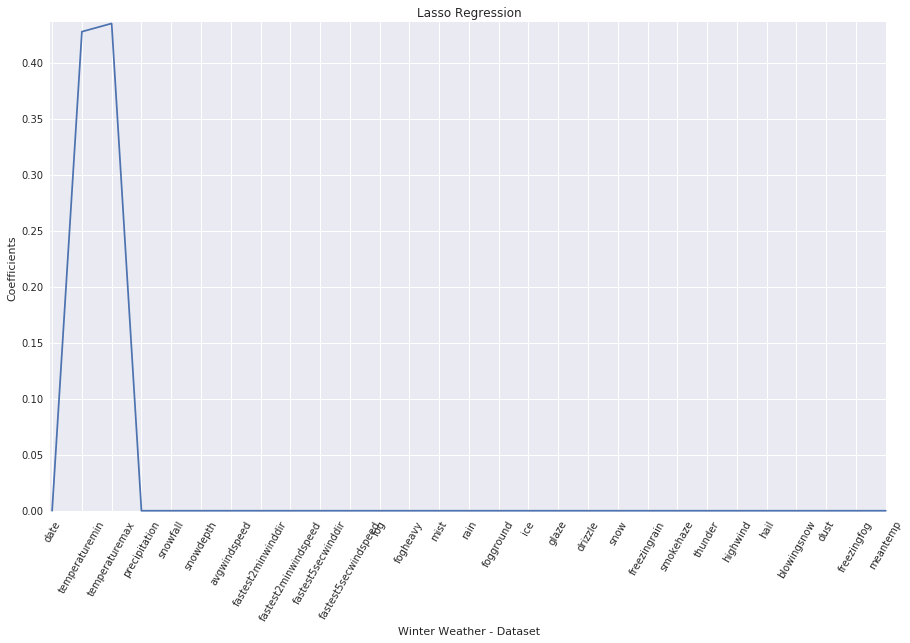

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X_winter = winter_weather_history.drop('meantemp', axis=1)
X_winter.shape

y_winter = (winter_weather_history['meantemp'])
y_winter.shape

X_train, X_test, y_train, y_test = train_test_split(X_winter, y_winter, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.05, normalize=True)
lasso.fit(X_train, y_train) 

lasso_coef = lasso.coef_
print("Coeficientes:\n", lasso_coef)
print(lasso.score(X_train, y_train))
predict = lasso.predict(X_test)
print(predict)


plt.figure(figsize=(15,9))
plt.plot(lasso_coef)
plt.xticks(range(len(winter_weather_history.columns)), winter_weather_history.columns.values, rotation=60)
plt.margins(0.002)

plt.xlabel('Winter Weather - Dataset')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.show()



## 6. Referências   

> [Coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Refer%C3%AAncias)

> [A comprehensive beginners guide for Linear, Ridge and Lasso Regression](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)



